In [3]:
# Colab의 'content' 폴더에 제공받은 데이터들을 업로드합니다
# 업로드한 zip 파일을 압축 해제합니다
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/rock_scissors_paper_dataset.zip' -d '/content/'

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **과제**
**CNN 모델**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 가위바위보 데이터셋
*   **과제 내용**


1.   나만의 CNN 모델을 생성합니다.
2.   CNN 모델을 사용하여 학습 데이터셋을 학습합니다.
3.   평가 데이터셋을 사용하여 모델의 정확도를 계산합니다.
4.   자신의 손 사진을 촬영하여 모델이 정확하게 가위, 바위, 보를 맞추는지 확인해봅니다.
5.   손으로 표현한 가위, 바위, 보가 아닌 실제 가위, 돌, 보자기를 모델이 어떻게 분류하는지 확인해봅니다.

# **데이터셋**
이번 과제에서 사용할 데이터셋은 가위바위보 이미지 데이터셋입니다.   
데이터셋(rock_scissors_paper_dataset)은 학습 데이터셋(train 폴더)와 평가 데이터셋(test 폴더)로 나뉘어져 있습니다.


*   **학습 데이터셋**: 총 1500개 (가위, 바위, 보 각각 500개씩)
*   **평가 데이터셋**: 총 600개 (가위, 바위, 보 각각 200개씩)
*   **이미지 크기**: 가로 300 X 세로 200 픽셀


## 0. 데이터셋 전처리

가위바위보 데이터셋을 CNN 모델에 적용할 수 있도록 전처리합니다.

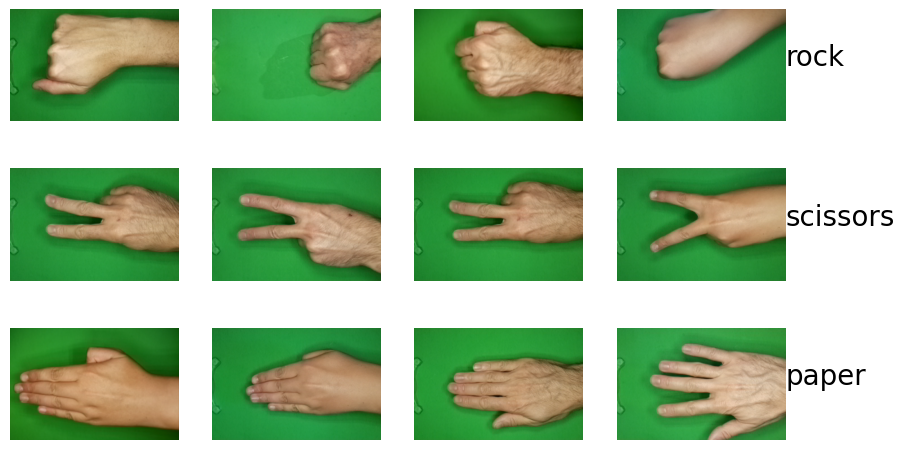

In [4]:
# 이미지 데이터셋 시각화
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(5, 4, figure=fig)

image_path = 'rock_scissors_paper_dataset/train'
for i, label in enumerate(['rock', 'scissors', 'paper']):
    for j, num in enumerate(random.sample(range(1, 501), 4)):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(f'{image_path}/{label}/{label}_train{num}.png'))
        ax.axis('off')
    ax.text(300, 100, label, fontsize=20)
plt.show()

In [5]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

# 데이터셋 로딩을 위한 Transform을 생성합니다
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# 데이터셋 로더를 생성합니다
train_dataset = datasets.ImageFolder(root='rock_scissors_paper_dataset/train', transform=transform)
test_dataset = datasets.ImageFolder(root='rock_scissors_paper_dataset/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


## 1. 나만의 CNN 모델 정의
이미지 데이터셋 학습을 위한 CNN 모델을 구현해봅니다.


In [6]:
# 파이토치 라이브러리 불러오기
import torch
import torch.nn as nn

### 모델 구조

*   입력 데이터 채널 개수: 3개 (R, G, B)
*   컨볼루션층의 커널 사이즈: 3 (3X3)
*   컨볼루션층의
*   풀링층의 인자: nn.MaxPool2d(2, 2)
*   출력 데이터의 크기: 3개 (가위, 바위, 보)
    
*   순전파 순서 : 컨볼루션1 -> 풀링1 -> 컨볼루션2 -> 풀링2 -> 컨볼루션3 -> 풀링3 -> 완전연결층 -> 출력층     
(**ReLU 함수는 적절한 곳에 넣으세요**)

In [7]:
# CNN 모델 정의
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # 아래의 빈칸을 채우세요
        self.conv1 = nn.Conv2d(3, 16, 3)  # 입력 채널: 3, 출력 채널: 16, 커널 크기: 3x3
        self.conv2 = nn.Conv2d(16, 32, 3)  # 입력 채널: 16, 출력 채널: 32, 커널 크기: 3x3
        self.conv3 = nn.Conv2d(32, 64, 3)  # 입력 채널: 32, 출력 채널: 64, 커널 크기: 3x3
        self.pool = nn.MaxPool2d(2, 2)  # 풀링 크기: 2x2
        self.fc1 = nn.Linear(64 * 26 * 26, 128)  # 완전연결층: 입력 노드 64 * 26 * 26, 출력 노드: 128
        self.fc2 = nn.Linear(128, 3)  # 완전연결층: 입력 노드 128, 출력 노드 3
        self.relu = torch.relu

    # 순전파 정의
    def forward(self, x):
        # 아래의 빈공간을 채우세요
        # ------------------------- #
        x = self.relu(self.conv1(x))  # 컨볼루션1 + ReLU
        x = self.pool(x)  # 풀링1
        x = self.relu(self.conv2(x))  # 컨볼루션2 + ReLU
        x = self.pool(x)  # 풀링2
        x = self.relu(self.conv3(x))  # 컨볼루션3 + ReLU
        x = self.pool(x)  # 풀링3
        x = torch.flatten(x, 1)  # 특징 맵을 1차원 벡터로 변환
        x = self.relu(self.fc1(x))  # 완전연결층 + ReLU
        x = self.fc2(x)  # 출력층
        # ------------------------- #
        return x

### 학습 함수와 평가 함수 정의

In [9]:
# train 함수를 완성하세요
def train(model, device, train_loader, criterion, optimizer, epoch):
    # --------------------- #
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0  # 누적 손실 초기화

    for batch_idx, (data, target) in enumerate(train_loader):
        # 데이터를 장치에 할당
        data, target = data.to(device), target.to(device)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파
        output = model(data)

        # 손실 계산
        loss = criterion(output, target)

        # 역전파
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

        # 배치 손실을 누적
        running_loss += loss.item()

        # 학습 상태 출력 (10번째 배치마다)
        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # 에포크당 평균 손실 출력
    print(f"Epoch [{epoch}] Training Loss: {running_loss / len(train_loader):.4f}")

    # --------------------- #

In [10]:
# 평가 함수를 완성하세요
def test(model, device, test_loader, criterion):
    # --------------------- #
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0.0  # 테스트 손실 초기화
    correct = 0  # 정확히 예측한 개수 초기화
    total = 0  # 전체 데이터 개수 초기화

    with torch.no_grad():  # 평가에서는 역전파를 하지 않음
        for data, target in test_loader:
            # 데이터를 장치에 할당
            data, target = data.to(device), target.to(device)

            # 순전파
            output = model(data)

            # 손실 계산
            loss = criterion(output, target)
            test_loss += loss.item()  # 배치 손실 누적

            # 예측값 계산 (가장 높은 확률을 가진 클래스 선택)
            _, predicted = torch.max(output, 1)
            correct += (predicted == target).sum().item()  # 올바른 예측 수 누적
            total += target.size(0)  # 전체 샘플 수 누적

    # 평균 손실 및 정확도 계산
    avg_loss = test_loss / len(test_loader)
    accuracy = 100.0 * correct / total

    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_loss, accuracy

    # --------------------- #


## 2. 모델 학습
학습 데이터셋을 활용하여 CNN 모델을 학습합니다.

In [11]:
import torch.optim as optim

# 아래의 빈칸을 완성하세요
# --------------------- #
model = MyCNN()  # CNN 모델 초기화
criterion = nn.CrossEntropyLoss()  # 손실 함수 초기화 (다중 클래스 분류에 적합)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 옵티마이저 초기화 (학습률 0.001로 Adam 사용)
# --------------------- #

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MyCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=43264, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [12]:
# 모델 학습
num_epochs = 10  # 학습 에포크 수 정의
for epoch in range(1, num_epochs + 1):  # 1부터 num_epochs까지 반복
    train(model, device, train_loader, criterion, optimizer, epoch)

Epoch [1], Batch [0/47], Loss: 1.1015
Epoch [1], Batch [10/47], Loss: 1.0209
Epoch [1], Batch [20/47], Loss: 0.5760
Epoch [1], Batch [30/47], Loss: 0.4189
Epoch [1], Batch [40/47], Loss: 0.4433
Epoch [1] Training Loss: 0.7494
Epoch [2], Batch [0/47], Loss: 0.2834
Epoch [2], Batch [10/47], Loss: 0.3742
Epoch [2], Batch [20/47], Loss: 0.2170
Epoch [2], Batch [30/47], Loss: 0.0667
Epoch [2], Batch [40/47], Loss: 0.2415
Epoch [2] Training Loss: 0.2343
Epoch [3], Batch [0/47], Loss: 0.2066
Epoch [3], Batch [10/47], Loss: 0.0326
Epoch [3], Batch [20/47], Loss: 0.0063
Epoch [3], Batch [30/47], Loss: 0.0321
Epoch [3], Batch [40/47], Loss: 0.0681
Epoch [3] Training Loss: 0.1035
Epoch [4], Batch [0/47], Loss: 0.0309
Epoch [4], Batch [10/47], Loss: 0.0531
Epoch [4], Batch [20/47], Loss: 0.0247
Epoch [4], Batch [30/47], Loss: 0.0025
Epoch [4], Batch [40/47], Loss: 0.0113
Epoch [4] Training Loss: 0.0353
Epoch [5], Batch [0/47], Loss: 0.0029
Epoch [5], Batch [10/47], Loss: 0.0084
Epoch [5], Batch [2

## 3. 모델 평가
학습한 CNN 모델을 사용하여 평가 데이터셋을 입력하여 모델의 정확도를 평가합니다

In [13]:
# 모델 평가
test(model, device, test_loader, criterion)

Test Loss: 0.1002, Accuracy: 97.33%


(0.10017992427731913, 97.33333333333333)

## 4. 직접 찍은 가위바위보 이미지에 대한 모델의 예측
직접 촬영한 가위, 바위, 보 이미지를 만들어서 모델에 입력해보겠습니다.    
직접 촬영해서 사용해도 되고, 제공한 이미지를 사용해도 됩니다. (rock, scissors, paper.png)    
촬영한 이미지를 CNN 모델에 입력하여 가위, 바위, 보 중에서 어떤 것으로 예측하는지 확인해봅니다.

In [19]:
from PIL import Image

# 이미지를 여는 함수
def load_image(image_path):
    image = Image.open(image_path)
    if image.mode == 'RGBA':  # 이미지가 RGBA 모드인지 확인
        image = image.convert('RGB')  # RGB 모드로 변환
    return image

# 이미지를 PyTorch 텐서로 변환하는 함수
def preprocess_image(image, target_size=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(target_size),  # 이미지 크기 조정
        transforms.ToTensor(),           # 이미지를 PyTorch 텐서로 변환
        transforms.Normalize(            # 이미지 정규화
            mean=[0.485, 0.456, 0.406],  # ImageNet 데이터셋의 평균값
            std=[0.229, 0.224, 0.225]    # ImageNet 데이터셋의 표준편차
        ),
    ])
    image_tensor = transform(image).unsqueeze(0)  # 배치 차원을 추가
    return image_tensor

# 이미지 파일 경로
rock_image_path = '/content/drive/MyDrive/Colab Notebooks/rock.jpg'
scissors_image_path = '/content/drive/MyDrive/Colab Notebooks/scissors.jpg'
paper_image_path = '/content/drive/MyDrive/Colab Notebooks/paper.jpg'

# 이미지를 열고 텐서로 변환
rock_image = load_image(rock_image_path)
rock_image_tensor = preprocess_image(rock_image).to(device)
scissors_image = load_image(scissors_image_path)
scissors_image_tensor = preprocess_image(scissors_image).to(device)
paper_image = load_image(paper_image_path)
paper_image_tensor = preprocess_image(paper_image).to(device)

images = [paper_image, rock_image, scissors_image]
image_tensors = [paper_image_tensor, rock_image_tensor, scissors_image_tensor]

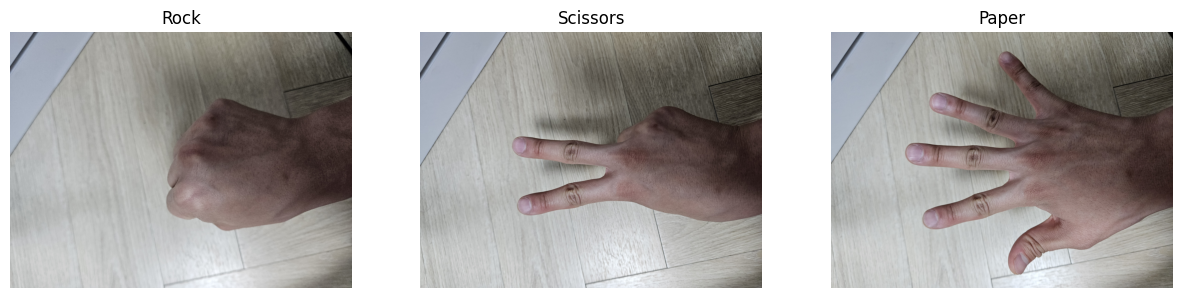

In [20]:
# 이미지를 화면에 출력
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(rock_image)
axes[0].set_title('Rock')
axes[0].axis('off')
axes[1].imshow(scissors_image)
axes[1].set_title('Scissors')
axes[1].axis('off')
axes[2].imshow(paper_image)
axes[2].set_title('Paper')
axes[2].axis('off')
plt.show()


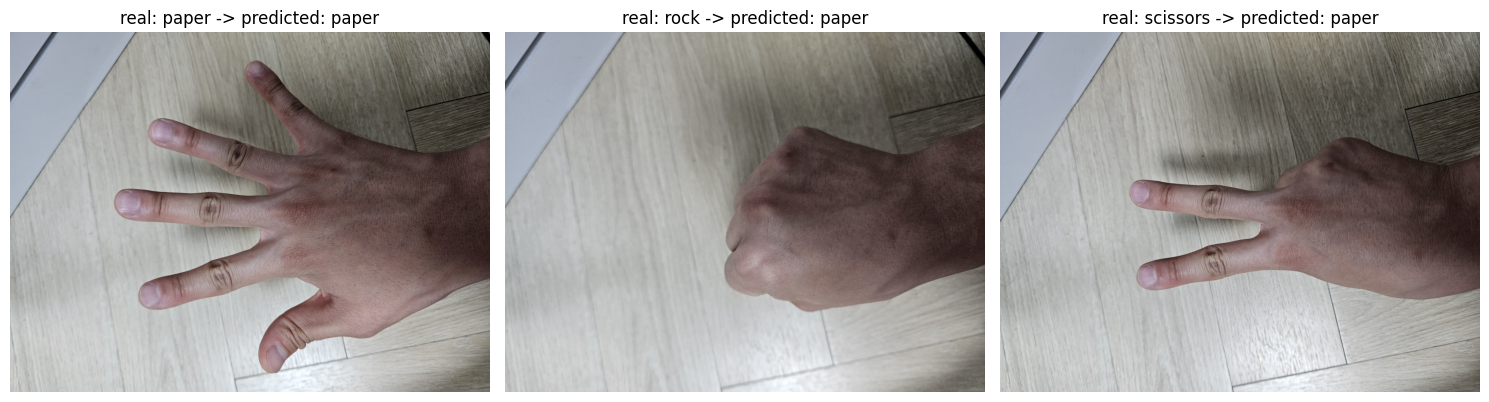

In [21]:
model.eval()

classes = ['paper', 'rock', 'scissors']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate(image_tensors):
    with torch.no_grad():
        # 불러온 손 이미지 데이터에 대한 에측값을 구합니다
        # 아래의 빈칸을 채우세요
        # ------------------------------ #
        output = model(data)  # 모델에 데이터를 입력하여 예측값 출력
        pred = torch.argmax(output, 1)  # 가장 높은 확률을 가진 클래스 인덱스
        pred = classes[pred.item()]  # 클래스 이름으로 변환
        # ------------------------------ #

        axes[i].imshow(images[i])
        axes[i].set_title(f'real: {classes[i]} -> predicted: {pred}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()


## 5. 실제 가위와 바위에 대한 모델의 예측
손으로 형상화한 가위, 바위, 보가 아닌 진짜 가위와 바위의 이미지(real_rock, real_scissors.png)를 모델이 무엇으로 예측하는지 확인해봅니다.    
(보는 손과 형태와 실제 보자기의 형태가 매우 다르기 때문에 제외합니다.)


In [23]:
# 이미지 파일 경로
rock_image_path = '/content/drive/MyDrive/Colab Notebooks/real_rock.png'
scissors_image_path = '/content/drive/MyDrive/Colab Notebooks/real_scissors.png'

# 이미지를 열고 텐서로 변환
rock_image = load_image(rock_image_path)
rock_image_tensor = preprocess_image(rock_image).to(device)
scissors_image = load_image(scissors_image_path)
scissors_image_tensor = preprocess_image(scissors_image).to(device)


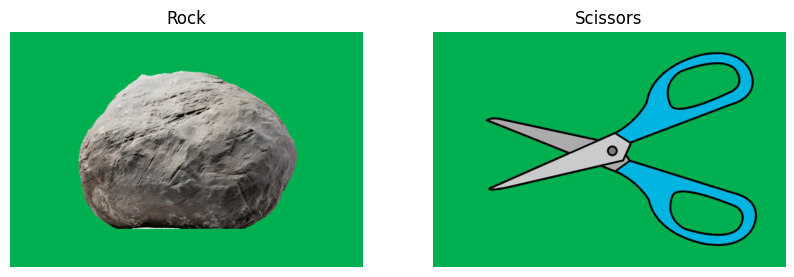

In [24]:
# 이미지를 화면에 출력
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rock_image)
axes[0].set_title('Rock')
axes[0].axis('off')
axes[1].imshow(scissors_image)
axes[1].set_title('Scissors')
axes[1].axis('off')
plt.show()

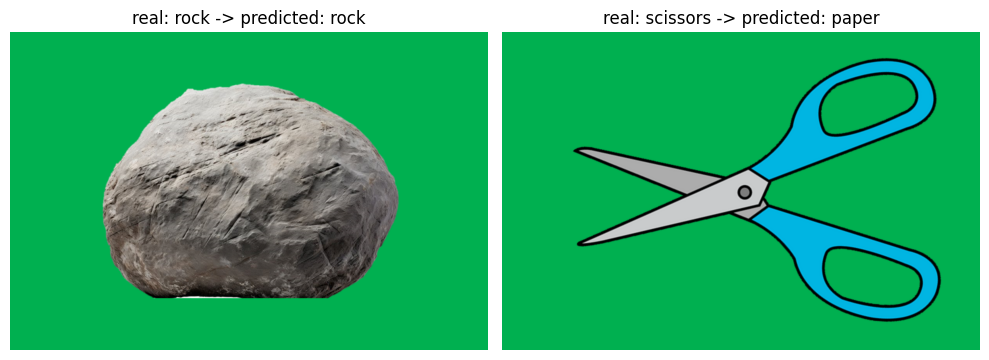

In [27]:
model.eval()

classes = ['rock', 'scissors', 'paper']  # 클래스 리스트 수정
images = [rock_image, scissors_image]
image_tensors = [rock_image_tensor, scissors_image_tensor]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, data in enumerate(image_tensors):
    with torch.no_grad():
        # 아래의 빈칸을 채우세요
        # ------------------------------ #
        output = model(data)  # 모델에 데이터를 입력하여 출력값(로짓) 계산
        pred = torch.argmax(output, 1)  # 가장 높은 확률을 가진 클래스 인덱스 선택
        pred_label = classes[pred.item()]
        # ------------------------------ #

        axes[i].imshow(images[i])
        axes[i].set_title(f'real: {classes[i]} -> predicted: {pred_label}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()